<a href="https://colab.research.google.com/github/CHIN-HUA/hellocolab/blob/main/B0829066_HW_chap02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ThinkDSP

This notebook contains code examples from Chapter 2: Harmonics

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [ ]:
# Get thinkdsp.py
#練習1   如果使用Jupyter，請加載chap02.ipynb並嘗試示例。您也可以在http://tinyurl.com/thinkdsp02上查看筆記本。

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

## Waveforms and harmonics

Create a triangle signal and plot a 3 period segment.

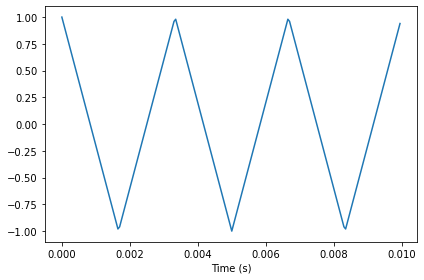

In [ ]:
#練習2   鋸齒信號的波形從-1線性上升到1，然後下降到-1並重複。參見 http://en.wikipedia.org/wiki/Sawtooth_wave
#編寫一個名為SawtoothSignal的類，該類 擴展Signal並提供 評估以評估鋸齒信號。

from thinkdsp import TriangleSignal
from thinkdsp import decorate

signal = TriangleSignal(300)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=20000)
segment.plot()
decorate(xlabel='Time (s)')

Make a wave and play it.

In [ ]:
wave = signal.make_wave(duration=0.1, framerate=10000)
wave.apodize()
wave.make_audio()

Compute its spectrum and plot it.

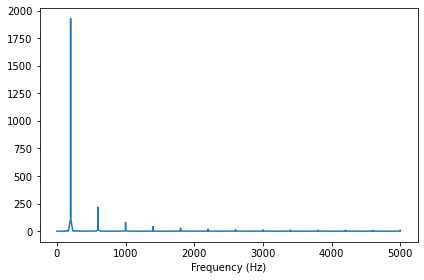

In [ ]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

Make a square signal and plot a 3 period segment.

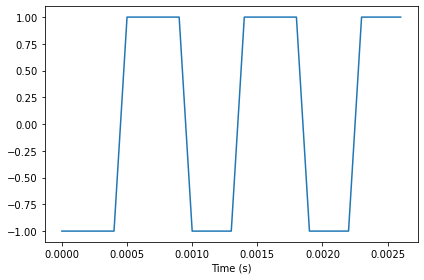

In [ ]:
#練習3產生   一個1100 Hz的方波，並產生一個以每秒10000幀的速度對其採樣的波形。如果繪製頻譜圖，則可以看到大多數諧波都是混疊的。當您聽波時，您能聽到混疊諧波嗎？
from thinkdsp import SquareSignal

signal = SquareSignal(1100)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Make a wave and play it.

In [ ]:
wave = signal.make_wave(duration=0.01, framerate=10000)
wave.apodize()
wave.make_audio()

Compute its spectrum and plot it.

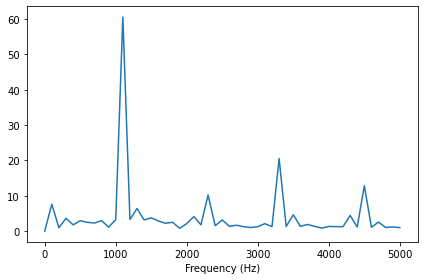

In [ ]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

Create a sawtooth signal and plot a 3 period segment.

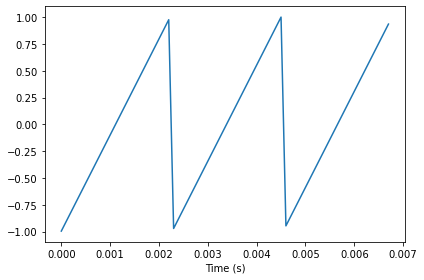

In [ ]:
#練習4   如果你有一個譜對象，頻譜，並打印的前幾個值spectrum.fs，你會看到，他們從零開始。因此，spectrum.hs [0]是頻率為0的分量的幅度。但這意味著什麼？
#試試這個實驗：

#製作一個頻率為440的三角形信號，並製作一個持續時間為0.01秒的Wave。繪製波形。
#創建一個Spectrum對象，並打印Spectrum.hs [0]。該分量的幅度和相位是多少？
#設置spectrum.hs [0] = 100。從修改後的頻譜中生成一個波形並將其繪製出來。此操作對波形有什麼影響？
from thinkdsp import SawtoothSignal

signal = SawtoothSignal(440)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Make a wave and play it.

In [ ]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

Compute its spectrum and plot it.

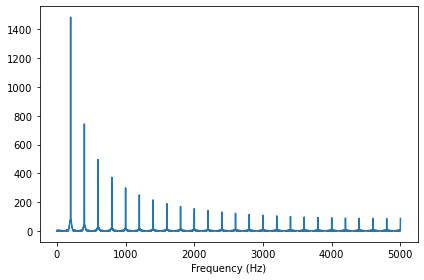

In [ ]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

### Aliasing

Make a cosine signal at 4500 Hz, make a wave at framerate 10 kHz, and plot 5 periods.

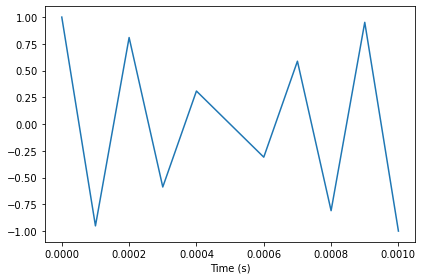

In [ ]:
from thinkdsp import CosSignal

signal = CosSignal(4500)
duration = signal.period*5
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Make a cosine signal at 5500 Hz, make a wave at framerate 10 kHz, and plot the same duration.

With framerate 10 kHz, the folding frequency is 5 kHz, so a 4500 Hz signal and a 5500 Hz signal look exactly the same.

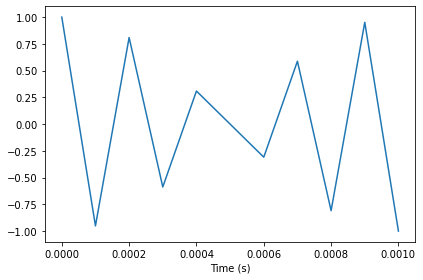

In [ ]:
signal = CosSignal(5500)
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Make a triangle signal and plot the spectrum.  See how the harmonics get folded.

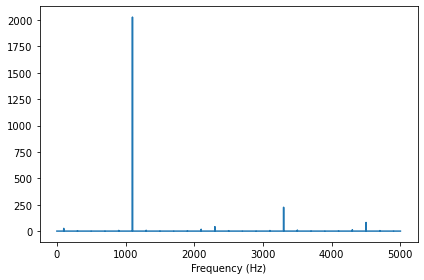

In [ ]:
signal = TriangleSignal(1100)
segment = signal.make_wave(duration=0.5, framerate=10000)
spectrum = segment.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

## Amplitude and phase

Make a sawtooth wave.

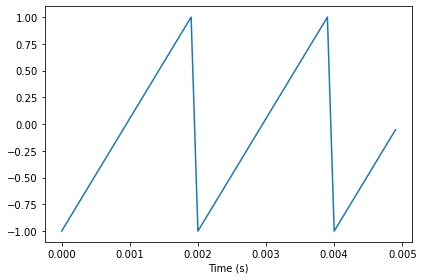

In [ ]:
signal = SawtoothSignal(500)
wave = signal.make_wave(duration=1, framerate=10000)
segment = wave.segment(duration=0.005)
segment.plot()
decorate(xlabel='Time (s)')

Play it.

In [ ]:
wave.make_audio()

Extract the wave array and compute the real FFT (which is just an FFT optimized for real inputs).

In [ ]:
#練習5   編寫一個函數，該函數以Spectrum為參數，並通過將hs的每個元素除以fs的相應頻率來對其進行修改。提示：由於未定義被零除，因此您可能需要設置Spectrum.hs [0] = 0。
#使用方波，三角波或鋸齒波測試您的功能。

#計算頻譜並繪製。
#使用您的函數修改頻譜並再次繪製。
#從修改後的頻譜中發出波浪，然後聆聽。此操作對信號有什麼影響？
import numpy as np

hs = np.fft.rfft(wave.ys)
hs 

array([ 5.11590770e-13+0.00000000e+00j,  2.19700679e-13-1.34559298e-13j,
       -2.09548671e-13-6.74603523e-14j, ...,
        4.19606174e-13+3.46000979e-14j, -5.63280756e-13+5.74915022e-14j,
       -5.26315789e+02+0.00000000e+00j])

Compute the frequencies that match up with the elements of the FFT.

In [ ]:
n = len(wave.ys)                 # number of samples
d = 1 / wave.framerate           # time between samples
fs = np.fft.rfftfreq(n, d)
fs

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 4.998e+03, 4.999e+03,
       5.000e+03])

Plot the magnitudes vs the frequencies.

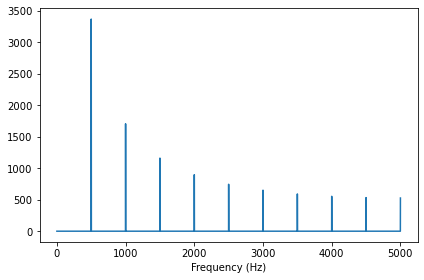

In [ ]:
import matplotlib.pyplot as plt

magnitude = np.absolute(hs)
plt.plot(fs, magnitude)
decorate(xlabel='Frequency (Hz)')

Plot the phases vs the frequencies.

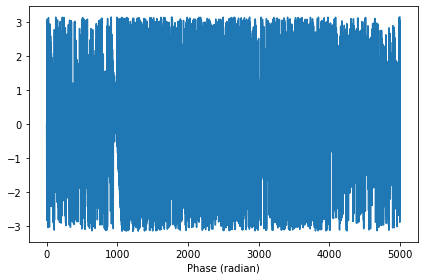

In [ ]:
angle = np.angle(hs)
plt.plot(fs, angle)
decorate(xlabel='Phase (radian)')

## What does phase sound like?

Shuffle the phases.

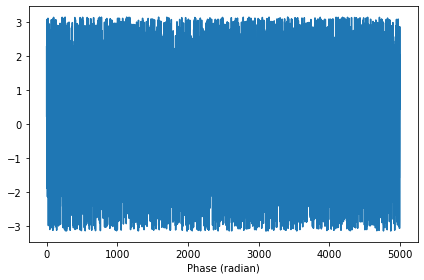

In [ ]:
import random
random.shuffle(angle)
plt.plot(fs, angle)
decorate(xlabel='Phase (radian)')

Put the shuffled phases back into the spectrum.  Each element in `hs` is a complex number with magitude $A$ and phase $\phi$, with which we can compute $A e^{i \phi}$

In [ ]:
i = complex(0, 1)
spectrum = wave.make_spectrum()
spectrum.hs = magnitude * np.exp(i * angle)

Convert the spectrum back to a wave (which uses irfft).

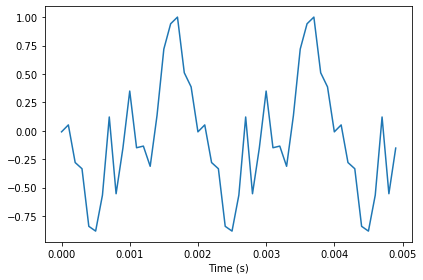

In [ ]:
wave2 = spectrum.make_wave()
wave2.normalize()
segment = wave2.segment(duration=0.005)
segment.plot()
decorate(xlabel='Time (s)')

Play the wave with the shuffled phases.

In [ ]:
wave2.make_audio()

For comparison, here's the original wave again.

In [ ]:
wave.make_audio()

Although the two signals have different waveforms, they have the same frequency components with the same amplitudes.  They differ only in phase.

## Aliasing interaction

The following interaction explores the effect of aliasing on the harmonics of a sawtooth signal.

In [ ]:
def view_harmonics(freq, framerate):
    """Plot the spectrum of a sawtooth signal.
    
    freq: frequency in Hz
    framerate: in frames/second
    """
    signal = SawtoothSignal(freq)
    wave = signal.make_wave(duration=0.5, framerate=framerate)
    spectrum = wave.make_spectrum()
    spectrum.plot(color='C0')
    decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')
    display(wave.make_audio())

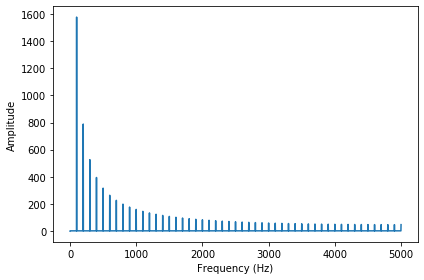

In [ ]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider1 = widgets.FloatSlider(min=100, max=10000, value=100, step=100)
slider2 = widgets.FloatSlider(min=5000, max=40000, value=10000, step=1000)
interact(view_harmonics, freq=slider1, framerate=slider2);